<a href="https://colab.research.google.com/github/allenphos/ML-course/blob/main/Copy_of_HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import pandas as pd

medical_df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

# Виділяємо X і y
X = non_smoker_df[['age']].values  # Двовимірний масив
y = non_smoker_df['charges'].values

In [58]:
def normal_equations(X,y): # Розраховує коефіцієнти лінійної регресії.
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Додаємо стовпець одиниць для врахування зміщення
# Це необхідно для врахування зміщення (константного терму bias) у моделі.
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

print(X[:3], X_with_intercept[:3])

# Обчислення коефіцієнтів
MNK_coefs = normal_equations(X_with_intercept, y)

predictions_MNK = np.dot(X_with_intercept, MNK_coefs) #Знаходить прогнозовані значення на основі обчислених коефіцієнтів.
print("predictions_MNK ", predictions_MNK)

# RMSE для МНК
rmse_mnk = root_mean_squared_error(y, predictions_MNK)
print(f"Коефіцієнти МНК: {MNK_coefs}, RMSE: {rmse_mnk:.2f}")


[[18]
 [28]
 [33]] [[ 1. 18.]
 [ 1. 28.]
 [ 1. 33.]]
predictions_MNK  [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Коефіцієнти МНК: [-2091.42055657   267.24891283], RMSE: 4662.51


Learning rate: 0.000100, m: 221.1046, b: -41.9813, RMSE: 4713.2506
Learning rate: 0.000010, m: 220.1546, b: 0.2130, RMSE: 4715.3498
Learning rate: 0.000001, m: 213.4576, b: 4.3312, RMSE: 4723.6477
Прогнозування град. спуску: [3937.9012503  6148.94709409 7254.47001599 ... 3937.9012503  3937.9012503
 4601.21500344],  Найкращий learning rate: 0.0001, m: 221.1046, b: -41.9813, RMSE: 4713.2506


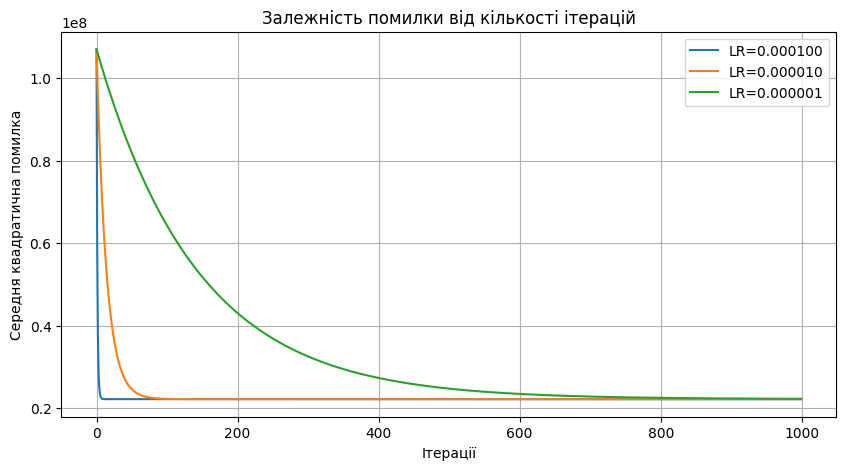

In [74]:
# Функція для градієнтного спуску
def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0
    n = len(y) # Кількість точок
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b # Прогнозування
        error = y_pred - y
        errors.append(np.mean(error ** 2))  # Середня квадратична помилка
        m_gradient = (2/n) * np.dot(error, X[:, 0]) # Обчислення градієнтів
        b_gradient = (2/n) * np.sum(error)
        m -= lr * m_gradient # Оновлення параметрів
        b -= lr * b_gradient
        # Check for NaN and break if found
        if np.isnan(m) or np.isnan(b):
            print("Gradient descent diverged. Try a smaller learning rate.")
            break  # Exit the loop if NaN is detected
    return m, b, errors

# Навчання з трьома learning rates
learning_rates = [0.0001, 0.00001, 0.000001]
results = {}

for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(X, y, lr=lr, epochs=1000)
    predictions = m * X[:, 0] + b
    # Обчислення RMSE
    rmse = root_mean_squared_error(y, predictions)
    results[lr] = {"predictions": predictions, "m": m, "b": b, "errors": errors, "rmse": rmse}
    print(f"Learning rate: {lr:.6f}, m: {m:.4f}, b: {b:.4f}, RMSE: {rmse:.4f}")

# Вибір найкращого learning rate
optimal_lr = min(results, key=lambda lr: results[lr]["rmse"])
predictions_opt, m_opt, b_opt, rmse_opt = results[optimal_lr]["predictions"], results[optimal_lr]["m"], results[optimal_lr]["b"], results[optimal_lr]["rmse"]
print(f"Прогнозування град. спуску: {predictions_opt},  Найкращий learning rate: {optimal_lr}, m: {m_opt:.4f}, b: {b_opt:.4f}, RMSE: {rmse_opt:.4f}")

# Графік помилки для кожного learning rate
plt.figure(figsize=(10, 5))
for lr, result in results.items():
    plt.plot(result["errors"], label=f"LR={lr:.6f}")
plt.title('Залежність помилки від кількості ітерацій')
plt.xlabel('Ітерації')
plt.ylabel('Середня квадратична помилка')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Навчання моделі
lin_reg = LinearRegression()
lin_reg.fit(X, y)
predictions_sklearn = lin_reg.predict(X)

# RMSE
rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print(f"Коефіцієнти sklearn: m={lin_reg.coef_[0]:.4f}, b={lin_reg.intercept_:.4f}, RMSE: {rmse_sklearn:.2f}")


Коефіцієнти sklearn: m=267.2489, b=-2091.4206, RMSE: 4662.51


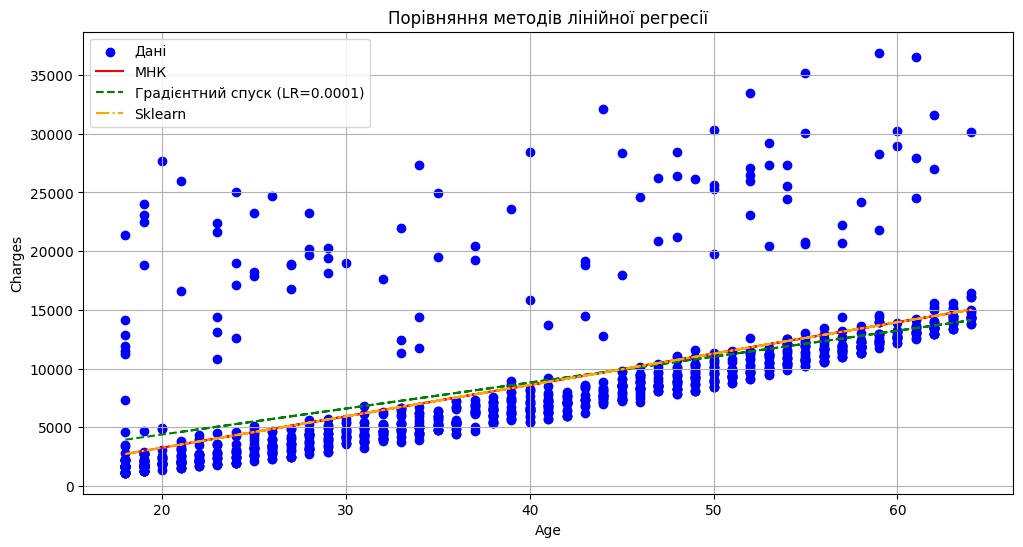

In [76]:
# Візуалізація всіх методів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Дані')
plt.plot(X, predictions_MNK, color='red', label='МНК')
plt.plot(X, m_opt * X[:, 0] + b_opt, color='green', linestyle='--', label=f'Градієнтний спуск (LR={optimal_lr})')
plt.plot(X, predictions_sklearn, color='orange', linestyle='-.', label='Sklearn')
plt.title('Порівняння методів лінійної регресії')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
print(f"Прогнози MNK:  {predictions_MNK}, Коефіцієнти МНК: {MNK_coefs}, RMSE: {rmse_mnk:.2f}\n")
print(f"Прогнози град. спуску:  {predictions_opt}, Learning rate: {optimal_lr}, Коефіцієнт моделі (нахил) m={m_opt:.4f}, Зсув моделі (перетин з віссю) b={b_opt:.4f}, RMSE: {rmse_opt:.4f}\n")
print(f"Прогнози sklearn:  {predictions_sklearn[:3]}, Коефіцієнт моделі (нахил) m={lin_reg.coef_[0]:.4f}, Зсув моделі (перетин з віссю) b={lin_reg.intercept_:.4f}, RMSE: {rmse_sklearn:.2f}\n")

Прогнози MNK:  [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289], Коефіцієнти МНК: [-2091.42055657   267.24891283], RMSE: 4662.51

Прогнози град. спуску:  [3937.9012503  6148.94709409 7254.47001599 ... 3937.9012503  3937.9012503
 4601.21500344], Learning rate: 0.0001, Коефіцієнт моделі (нахил) m=221.1046, Зсув моделі (перетин з віссю) b=-41.9813, RMSE: 4713.2506

Прогнози sklearn:  [26093.642567   39218.85945773 28535.54338388], Коефіцієнт моделі (нахил) m=305.2376, Зсув моделі (перетин з віссю) b=20294.1281, RMSE: 10711.00



Моделі sklearn та МНК є однаковими, а град. спуск трохи відрізняється. В ціломи лінії регресії дуже схожі, як і коефіціенти та помилки.

Мое припущення (250, -1000) виявилось близьким до машиного m=267.2489, b=-2091.4206

Моделі досить точно показують оцінку розміру медичних зборів для не курців за їх віком.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Нахил (коефіцієнт): Відображає, на скільки в середньому змінюються медичні збори з віком.

Зсув (перетин): Показує очікувані збори для курців з нульовим віком (не має практичного сенсу, але є частиною математичної моделі).

RMSE (Root Mean Squared Error): Показує середню відстань між прогнозованими значеннями і фактичними. Чим менше, тим краще.

R² (коефіцієнт детермінації): Відображає, яку частку варіації залежної змінної пояснює модель. Значення ближче до 1 означає гарну відповідність.

In [79]:
from sklearn.metrics import r2_score

smoker_df = medical_df[medical_df.smoker == 'yes']

# Виділяємо X і y
X = smoker_df[['age']].values  # Двовимірний масив
y = smoker_df['charges'].values

# Навчання моделі
model = LinearRegression()
model.fit(X, y)

# Отримання коефіцієнтів
coef = model.coef_[0]
intercept = model.intercept_

# Прогнози моделі
y_pred = model.predict(X)

# # Точність моделі
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Результати
print(f"Коефіцієнт моделі (нахил) m: {coef:.4f}")
print(f"Зсув моделі (перетин з віссю) b: {intercept:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Коефіцієнт моделі (нахил): 305.2376
Зсув моделі (перетин з віссю): 20294.1281
RMSE: 10711.00
R²: 0.14


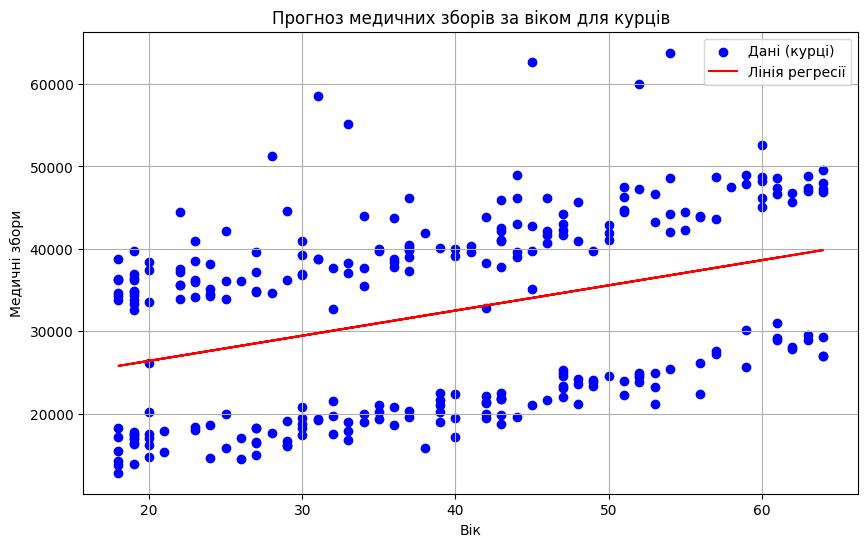

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Дані (курці)')
plt.plot(X, y_pred, color='red', label='Лінія регресії')
plt.title('Прогноз медичних зборів за віком для курців')
plt.xlabel('Вік')
plt.ylabel('Медичні збори')
plt.legend()
plt.grid(True)
plt.show()

Високий RMSE свідчить про те, що скоріш за все є інші фактори, які впливають на медичні збори.

Коефіцієнт детермінації низький, це означає, що модель не в змозі пояснити будь-які варіабельності реагуючих даних.


Модель не точна та потребує вдосконалення. Практична її цінність для компанії стоїть під питанням.